<a href="https://colab.research.google.com/github/monikadhana/TNSDC/blob/main/Handwritten_Digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

========================= Importing Packages =========================
========================= Imported  Packages =========================

============================ Loading Data ============================
11490434/11490434 [==============================] - 0s 0us/step
========================== Loading Complete ==========================

========================== Visualizing Data ==========================


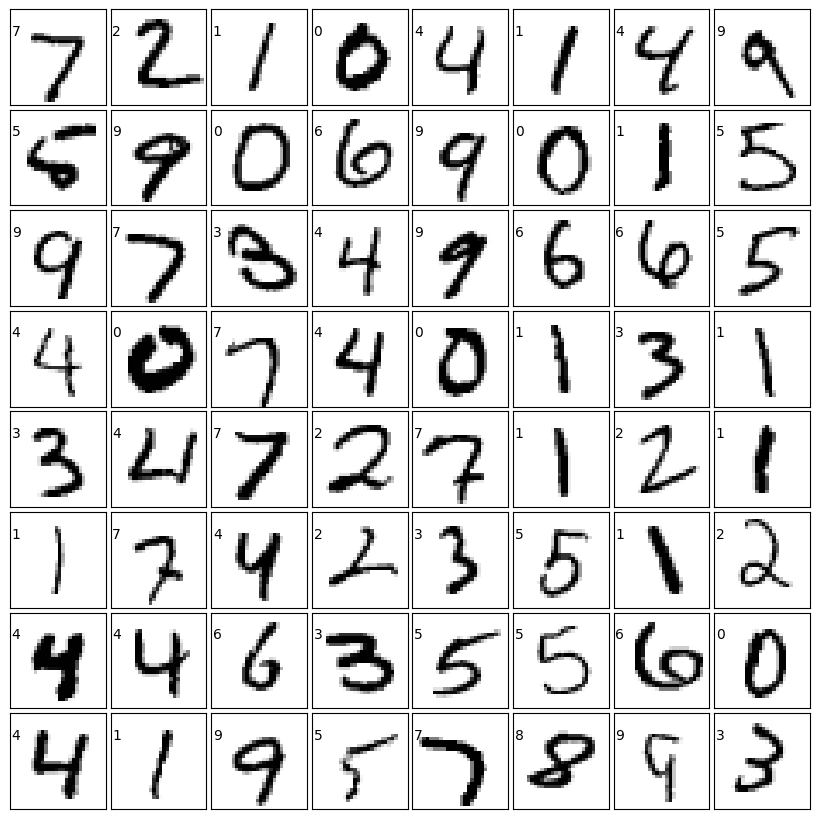


========================== Creating a model ==========================

============================ modelSummary ============================
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 28)                302876    
                                                                 
 dense_1 (Dense)             (None, 10)                290       
                                            

In [1]:
print("========================= Importing Packages =========================")
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from keras.preprocessing import image
from PIL import Image
import cv2

# Warning handler
import warnings
warnings.filterwarnings('ignore')
print("========================= Imported  Packages =========================")
print("")
# Loading Data
print("============================ Loading Data ============================")
handwriting_mnist = keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels) = handwriting_mnist.load_data()
train_images = train_images.reshape(len(train_images),28,28,1)
test_images = test_images.reshape(len(test_images),28,28,1)
print("========================== Loading Complete ==========================")
print("")
# Test Data Visualization
print("========================== Visualizing Data ==========================")
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(test_images[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    ax.text(0, 7, str(test_labels[i]))
plt.show()
print("")
# Creating model
print("========================== Creating a model ==========================")
model = keras.models.Sequential([
                                 keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
                                 keras.layers.MaxPool2D(2,2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(28,activation='relu'),
                                 keras.layers.Dense(10,activation='softmax')
])
print("")
print("============================ modelSummary ============================")
print(model.summary())
print("")
# Model Compile
print("========================== Compiling  model ==========================")
model.compile(optimizer='adam',metrics=['acc'],loss='sparse_categorical_crossentropy')
print("")
print("========================== Model's Compiled ==========================")
# Accuracy Callback
class handwriting_acc_callback(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('acc')>=0.9):
       print("\n Model has reached 90% accuracy! Congratulations !!!!!")
       self.model.stop_training = True

handwriting_acc_callback = handwriting_acc_callback()
print("")
# Model Fitting
print("============================= Model- Fit =============================")
model.fit(train_images,train_labels,epochs=100,callbacks=[handwriting_acc_callback])
print("")
# Model Evaluation
print("========================== Model Evaluation ==========================")
model.evaluate(test_images,test_labels)
print("")
print("======================================================================")
print("======================================================================")
print("======= Congratulations model was succesful with >90% accuracy =======")
print("======================================================================")
print("======================================================================")
print("")
print("================= Now goahead and run the next cell! =================")